## My project ##

First we load the datasets and import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
#import spacy
#import string
#pd.options.mode.chained_assignment = None


# Load the first CSV file
Tr = "data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "data/Fake.csv"
dfF = pd.read_csv(Fa)

# For example, you can display the first few rows of each DataFrame
print("First DataFrame:")
print(f"Shape: {dfT.shape}")
print(dfT.head())

print("\nSecond DataFrame:")
print(f"Shape: {dfF.shape}")
print(dfF.head())


First DataFrame:
Shape: (21417, 4)
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Second DataFrame:
Shape: (23481, 4)
                          

Lower Cassing

In [2]:

# Convert the text_df text column to lowercase
dfT["text"] = dfT["text"].str.lower()

print("After lowering:")
print(dfT.head().text.values)
dfT.head()

# Convert the text_df text column to lowercase
dfT["text"] = dfT["text"].str.lower()

print("After lowering:")
print(dfT.head().text.values)
dfT.head()


# Convert the text_df text column to lowercase
dfF["text"] = dfF["text"].str.lower()

print("After lowering:")
print(dfF.head().text.values)
dfF.head()

# Convert the text_df text column to lowercase
dfF["text"] = dfF["text"].str.lower()

print("After lowering:")
print(dfF.head().text.values)
dfF.head()

After lowering:
['washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for non-defense “discretionary” spending on programs th

After lowering:
['washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for non-defense “discretionary” spending on programs th

After lowering:
['donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump (@realdonaldtrump) december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017"


Removal of punctuation

In [3]:
import pandas as pd
import string

# Function to remove punctuation and convert text to lowercase
def remove_punctuation(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to a DataFrame's 'text' column
def clean_and_print(df):
    df["text"] = df["text"].apply(remove_punctuation)
    print("After cleaning:")
    print(df.head().text.values)
    return df.head()

# for test
dataTest = {"text": ["Hello, World!", "ABCabc!!!!!!!..,;,,;,;."]}


dfT = pd.DataFrame(dfT)
dfF = pd.DataFrame(dfF)

# Apply the cleaning function to the DataFrames
clean_and_print(dfT)
clean_and_print(dfF)


After cleaning:
['washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education 

After cleaning:
['donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and  the very dishonest fake news media  the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year  president angry pants tweeted  2018 will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year 2018 will be a great year for america  donald j trump realdonaldtrump december 31 2017trump s tweet went down about as welll as you d expectwhat kind of president sends a new year s greeting like this despicable petty infantile gibberish only trump his lack of decency won t even allow him to

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017"


In [4]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Function to remove punctuation, stopwords, and convert text to lowercase
def remove_punctuation_and_stopwords(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = " ".join([word for word in words if word not in stop_words])
    return text

# Apply the remove_punctuation_and_stopwords function to a DataFrame's 'text' column
def clean_and_print(df):
    df["text"] = df["text"].apply(remove_punctuation_and_stopwords)
    print("After cleaning:")
    print(df.head().text.values)
    return df.head()

# Create a sample DataFrame
dataTest = {"text": ["Hello, World!", "ABCabc!!!!!!!..,;,,;,;."]}

dfT = pd.DataFrame(dfT)
dfF = pd.DataFrame(dfF)

# Apply the cleaning function to the DataFrame
clean_and_print(dfT)
clean_and_print(dfF)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After cleaning:
['washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called “fiscal conservative” sunday urged budget restraint 2018 keeping sharp pivot way among republicans us representative mark meadows speaking cbs’ “face nation” drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases nondefense “discretionary” spending programs support education scientific research infrastructure public health environmental protection “the trump administration already willing say ‘we’re going increase nondefense discretionary spending 7 percent’” meadows chairman small influential house freedom

After cleaning:
['donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congress miranda yaver mirandayaver december 31 2017do

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017"


In [5]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def remove_punctuation_stopwords_and_stem(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Perform stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    text = " ".join(stemmed_words)
    return text

# Apply the remove_punctuation_stopwords_and_stem function to a DataFrame's 'text' column
def clean_and_print(df):
    df["text"] = df["text"].apply(remove_punctuation_stopwords_and_stem)
    print("After cleaning:")
    print(df.head().text.values)
    return df.head()

# Create a sample DataFrame
dataTest = {"text": ["Hello, World!", "ABCabc!!!!!!!..,;,,;,;."]}

dfT = pd.DataFrame(dfT)
dfF = pd.DataFrame(dfF)
# Apply the cleaning function to the DataFrame
clean_and_print(dfT)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After cleaning:
['washington reuter head conserv republican faction us congress vote month huge expans nation debt pay tax cut call “fiscal conservative” sunday urg budget restraint 2018 keep sharp pivot way among republican us repres mark meadow speak cbs’ “face nation” drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas nondefens “discretionary” spend program support educ scientif research infrastructur public health environment protect “the trump administr alreadi will say ‘we’r go increas nondefens discretionari spend 7 percent’” meadow chairman small influenti hous freedom caucu said program “now democrat say that’ enough need give govern pay rais 10 11 percent fiscal conserv don’t see rational eve

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",washington reuter head conserv republican fact...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,washington reuter transgend peopl allow first ...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuter special counsel investig lin...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,washington reuter trump campaign advis georg p...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuter presid donald trump c...,politicsNews,"December 29, 2017"


## The big function

we put all the cells before into one to abve a signe cleaning function.

In [6]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)

    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)

    return text

# Apply the preprocess_text function to a DataFrame's 'text' column
def clean_and_print(df, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    df["text"] = df["text"].apply(lambda text: preprocess_text(text, remove_punctuation, remove_stopwords, perform_stemming))
    print("After preprocessing:")
    print(df.head().text.values)
    return df.head()

# Load the first CSV file
Tr = "Data\True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data\Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
clean_and_print(dfT, remove_punctuation=True, remove_stopwords=True, perform_stemming=True)
clean_and_print(dfF, remove_punctuation=True, remove_stopwords=True, perform_stemming=True)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After preprocessing:
['washington reuter head conserv republican faction us congress vote month huge expans nation debt pay tax cut call “fiscal conservative” sunday urg budget restraint 2018 keep sharp pivot way among republican us repres mark meadow speak cbs’ “face nation” drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas nondefens “discretionary” spend program support educ scientif research infrastructur public health environment protect “the trump administr alreadi will say ‘we’r go increas nondefens discretionari spend 7 percent’” meadow chairman small influenti hous freedom caucu said program “now democrat say that’ enough need give govern pay rais 10 11 percent fiscal conserv don’t see rationa

After preprocessing:
['donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet 2018 great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year 2018 great year america donald j trump realdonaldtrump decemb 31 2017trump tweet went welll expectwhat kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb 31 2017no one like calvin calvinstowel decemb 31 2017your impeach would make 2018 great year america also accept regain control congress miranda yaver mirandayav decemb 31 2017do hear talk includ mani peopl hate wonder hate alan sand

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happi new year leav...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,hous intellig committe chairman devin nune go ...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,friday reveal former milwauke sheriff david cl...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,christma day donald trump announc would back w...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope franci use annual christma day messag reb...,News,"December 25, 2017"


## text analysis Frequent Words

the most used words a visualisation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


the most comment words in true news are :
trump: 73422
said: 31008
people: 25941
president: 25495
would: 23420
one: 22865
us: 22005
clinton: 17957
obama: 17760
like: 17596
donald: 17101
also: 15221
new: 14135
news: 14099
even: 13658
hillary: 13510
white: 12767
time: 12689
state: 12494
via: 11164
the most comment words in fake news are :
trump: 73422
said: 31008
people: 25941
president: 25495
would: 23420
one: 22865
us: 22005
clinton: 17957
obama: 17760
like: 17596
donald: 17101
also: 15221
new: 14135
news: 14099
even: 13658
hillary: 13510
white: 12767
time: 12689
state: 12494
via: 11164


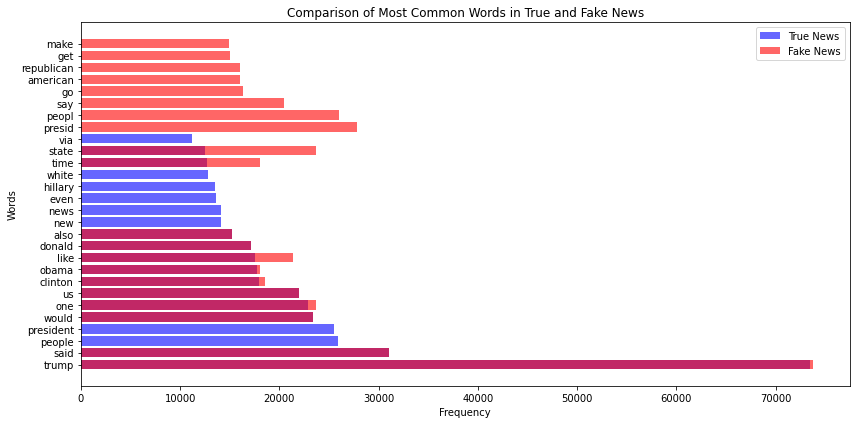

In [7]:
import pandas as pd
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


# Download stopwords if not already downloaded
nltk.download('stopwords')

# Function to tokenize and preprocess text
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words


Tr = "Data\True.csv"
dfT = pd.read_csv(Tr)
Tf = "Data\Fake.csv"
dfT = pd.read_csv(Tf)


# Combine all text into a single string
combined_text = " ".join(dfT["text"].astype(str))

# Tokenize and preprocess the text
wordsT = preprocess_text(combined_text)

# Count word frequencies
word_countT = Counter(wordsT)

# Get the 20 most common words
most_common_wordsT = word_countT.most_common(20)

# Print the 20 most common words
print("the most comment words in true news are :")
for word, count in most_common_wordsT:
    print(f'{word}: {count}')




# Combine all text into a single string
combined_text = " ".join(dfF["text"].astype(str))

# Tokenize and preprocess the text
wordsF = preprocess_text(combined_text)

# Count word frequencies
word_countF = Counter(wordsF)

# Get the 20 most common words
most_common_wordsF = word_countF.most_common(20)

# Print the 20 most common words
print("the most comment words in fake news are :")
for word, count in most_common_wordsT:
    print(f'{word}: {count}')


# Extract words and counts for plotting
wordsT, countsT = zip(*most_common_wordsT)
wordsF, countsF = zip(*most_common_wordsF)

# Create bar charts to compare the most common words
plt.figure(figsize=(12, 6))
plt.barh(wordsT, countsT, color='blue', label='True News', alpha=0.6)
plt.barh(wordsF, countsF, color='red', label='Fake News', alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Comparison of Most Common Words in True and Fake News')
plt.legend()
plt.tight_layout()
plt.show()

## text analysis Sentiment anamlysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


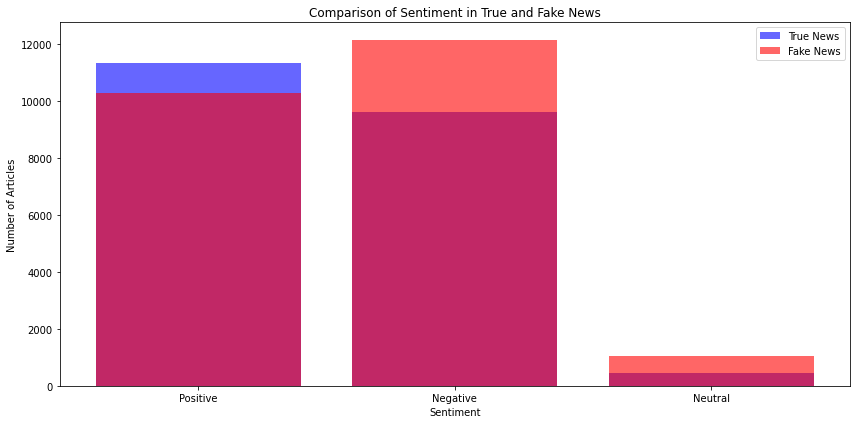

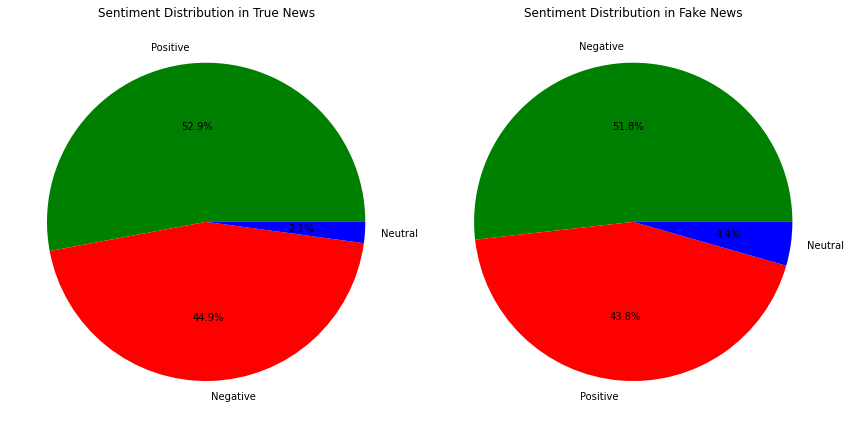

In [8]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)
Tf = "Data/Fake.csv"
dfF = pd.read_csv(Tf)

# Function to classify sentiment
def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Classify the sentiment for each news article
dfT['Sentiment'] = dfT['text'].apply(classify_sentiment)
dfF['Sentiment'] = dfF['text'].apply(classify_sentiment)

# Count the number of articles in each sentiment category
true_sentiment_counts = dfT['Sentiment'].value_counts()
fake_sentiment_counts = dfF['Sentiment'].value_counts()

# Create bar charts to compare the sentiment distribution
plt.figure(figsize=(12, 6))
plt.bar(true_sentiment_counts.index, true_sentiment_counts.values, color='blue', label='True News', alpha=0.6)
plt.bar(fake_sentiment_counts.index, fake_sentiment_counts.values, color='red', label='Fake News', alpha=0.6)
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.title('Comparison of Sentiment in True and Fake News')
plt.legend()
plt.tight_layout()
#plt.show()

# Create pie charts to visualize the sentiment distribution
plt.figure(figsize=(12, 6))

plt.subplot(121)  # Left subplot for True News
plt.pie(true_sentiment_counts, labels=true_sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in True News')

plt.subplot(122)  # Right subplot for Fake News
plt.pie(fake_sentiment_counts, labels=fake_sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Fake News')

plt.tight_layout()
plt.show()

Save the cleaned files

In [9]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)

    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)

    return text

# Apply the preprocess_text function to a DataFrame's 'text' column
def preprocess_dataframe(df, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    df_copy = df.copy()
    df_copy["text"] = df_copy["text"].apply(lambda text: preprocess_text(text, remove_punctuation, remove_stopwords, perform_stemming))
    return df_copy

# Load the first CSV file
Tr = "Data\True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data\Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames and create clean datasets
Clean_True = preprocess_dataframe(dfT, remove_punctuation=True, remove_stopwords=True, perform_stemming=True)
Clean_Fake = preprocess_dataframe(dfF, remove_punctuation=True, remove_stopwords=True, perform_stemming=True)

# Save the clean datasets to CSV files if needed
Clean_True.to_csv("Data\Clean_True.csv", index=False)
Clean_Fake.to_csv("Data\Clean_Fake.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## machine learning with tensor flow

In [10]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)

    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)

    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Tokenize the preprocessed text
sentencesT = [text.split() for text in dfT["text"]]
sentencesF = [text.split() for text in dfF["text"]]

# Train Word2Vec models on the tokenized sentences
modelT = Word2Vec(sentencesT, vector_size=100, window=5, min_count=1, sg=0)
modelF = Word2Vec(sentencesF, vector_size=100, window=5, min_count=1, sg=0)

# You can access the word vectors using modelT.wv and modelF.wv

# Example: Get the vector for a word
#word_vector = modelT.wv['example_word']

# Example: Find similar words
#similar_words = modelT.wv.most_similar('example_word', topn=10)


ModuleNotFoundError: No module named 'gensim'

In [ ]:
from sklearn.model_selection import train_test_split
test = "data/english_test_with_labels.xls"
df = pd.read_csv(test)
print(df)
# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for training and testing your model

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a TF-IDF vectorizer to convert text data to numerical features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Predict labels for the test set
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import multiprocessing

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)

    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)

    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Tokenize the preprocessed text
sentences = [text.split() for text in df["text"]]

# Train a Word2Vec model
cores = multiprocessing.cpu_count()  # Number of CPU cores to use
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, workers=cores)

# Save the Word2Vec model
word2vec_model.save("word2vec.model")

# You can now use this trained Word2Vec model for feature extraction in your deep learning model as previously shown.


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)

    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)

    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Load the Word2Vec model (assuming you have already trained it)
word2vec_model = Word2Vec.load("word2vec.model")

# Create an embedding matrix using the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Build a deep learning model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

# Evaluate the model's performance
accuracy = model.evaluate(X_test_padded, y_test)[1]
print("Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to remove punctuation, stopwords, and perform stemming
def preprocess_text(text, remove_punctuation=True, remove_stopwords=True, perform_stemming=True):
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = " ".join(words)

    if perform_stemming:
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = " ".join(stemmed_words)

    return text

# Load the first CSV file
Tr = "Data/True.csv"
dfT = pd.read_csv(Tr)

# Load the second CSV file
Fa = "Data/Fake.csv"
dfF = pd.read_csv(Fa)

# Preprocess text in the DataFrames
dfT["text"] = dfT["text"].apply(preprocess_text)
dfF["text"] = dfF["text"].apply(preprocess_text)

# Combine the true and fake dataframes
df = pd.concat([dfT, dfF], ignore_index=True)

# Create labels for true and fake news (0 for true, 1 for fake)
df['label'] = 0  # Label true news as 0
df.loc[df.index >= len(dfT), 'label'] = 1  # Label fake news as 1

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Load the Word2Vec model (assuming you have already trained it)
word2vec_model = Word2Vec.load("word2vec.model")

# Create an embedding matrix using the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Build a deep learning model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

# Make predictions
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision
precision = precision_score(y_test, y_pred_binary)
print("Precision: {:.2f}".format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred_binary)
print("Recall: {:.2f}".format(recall))

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score: {:.2f}".format(f1))


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["True", "Fake"], yticklabels=["True", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import roc_curve, auc



In [ ]:
# You can plot the ROC curve to visualize the trade-off between the true positive rate (sensitivity) and the false positive rate. This curve can help you understand how well your model discriminates between classes.

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# You can visualize the distribution of the true and predicted labels to see how balanced or imbalanced your dataset is.
from sklearn.metrics import precision_recall_curve

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=df)
plt.xticks([0, 1], ["True", "Fake"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


In [ ]:
# This curve shows the trade-off between precision and recall for different thresholds. It's particularly useful when dealing with imbalanced datasets.
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
